- An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

- For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalized in that year, the insurance provider company will bear the cost of hospitalization etc. for up to Rs. 200,000. Now if you are wondering how can company bear such high hospitalization cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalized that year and not everyone. This way everyone shares the risk of everyone else.

- Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

#### Objective: 
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.

We have information about:

FEATURES: 

- 1. Gender- Male/Female
- 2. Age - Age of the vehicle owner
- 3. Driving_License - 1: Has DL, 0: No DL
- 4. Region_Code
- 5. Previously_Insured - 0/1
- 6. Vehicle_Age - 1 to 2 Year, <1 year, >2 years
- 7. Vehicle_Damage - Yes/ No
- 8. Annual_Premium
- 9. Policy_Sales_Channel
- 10. Vintage - This metric represents the number of days a customer has been insured up until now and is therefore ordinal in nature.
- 11. id - Id of the user

TARGET : 
- Response - 0/1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [5]:
# First converting Policy_Sales_Channel and  Region_Code to int to remove decimal point
def col_to_Int(df):
    col = ["Region_Code", "Policy_Sales_Channel"]
    df[col] = df[col].astype("int64")
    
col_to_Int(df)

In [6]:
# Converting Driving_License, Region_Code, Previously_Insured and Policy_Sales_Channel
def col_to_Cat(df):
    col = ["Gender", "Driving_License", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Policy_Sales_Channel"]
    df[col] = df[col].astype("category")
    
col_to_Cat(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    382154 non-null  int64   
 1   Gender                382154 non-null  category
 2   Age                   382154 non-null  int64   
 3   Driving_License       382154 non-null  category
 4   Region_Code           382154 non-null  category
 5   Previously_Insured    382154 non-null  category
 6   Vehicle_Age           382154 non-null  category
 7   Vehicle_Damage        382154 non-null  category
 8   Annual_Premium        382154 non-null  float64 
 9   Policy_Sales_Channel  382154 non-null  category
 10  Vintage               382154 non-null  int64   
 11  Response              382154 non-null  int64   
dtypes: category(7), float64(1), int64(4)
memory usage: 17.5 MB


In [8]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7,1,< 1 Year,No,2630.0,152,16,0
1,17163,Male,42,1,28,0,1-2 Year,Yes,43327.0,26,135,0


In [9]:
df.Gender.value_counts()

Male      205603
Female    176551
Name: Gender, dtype: int64

In [10]:
df.Vehicle_Age.value_counts()

1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: Vehicle_Age, dtype: int64

In [11]:
df.Vehicle_Damage.value_counts()   # 1 means person has DL

No     198501
Yes    183653
Name: Vehicle_Damage, dtype: int64

In [12]:
df.Region_Code.nunique(), df.Policy_Sales_Channel.nunique()

(53, 156)

## EDA

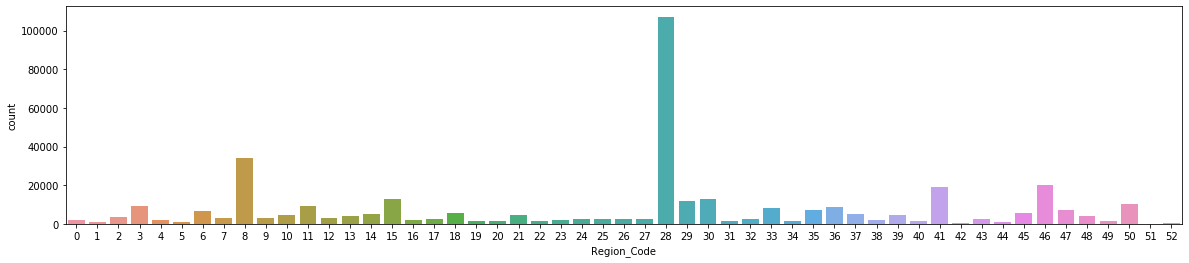

In [53]:
plt.figure(figsize=(20,4))
sns.countplot(df.Region_Code);

**- Region Code 28 is very active in terms of selling insurances**

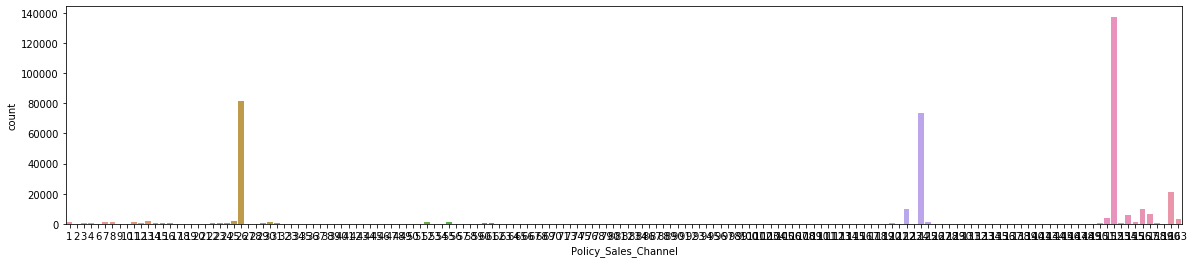

In [56]:
plt.figure(figsize=(20,4))
sns.countplot(df.Policy_Sales_Channel);

**- 3 of the 156 Policy sales channels are very active in terms of selling insurances**

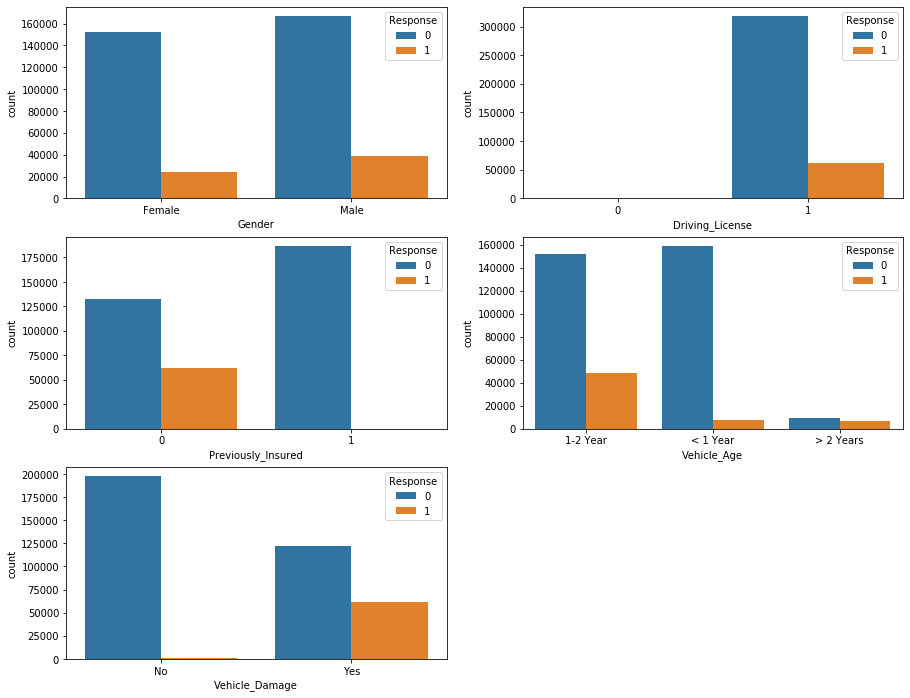

In [78]:
fig, ax = plt.subplots(nrows =3, ncols=2, figsize=(15,12))
sns.countplot(df.Gender, hue = df.Response, ax= ax[0,0]);
sns.countplot(df.Driving_License, hue = df.Response, ax= ax[0,1]);
sns.countplot(df.Previously_Insured, hue = df.Response, ax= ax[1,0]);
sns.countplot(df.Vehicle_Age, hue = df.Response, ax= ax[1,1]);
sns.countplot(df.Vehicle_Damage, hue = df.Response, ax= ax[2,0]);
fig.delaxes(ax[2,1])

**1. Among people opting for insurance, males are almost twice as that of females.**

**2. In the Driving License plot, we see that almost everyone has a DL, so I will remove this column as it has no impact on Response.**

**3. Amonng those who have not been previously insured, around half of them are option for this insurance.**

**4. As the vehicle age increases, less and less people are opting for insuracne.**

**5. People who have had vehicle damage, around half of them are willing to opt for this insurance.**

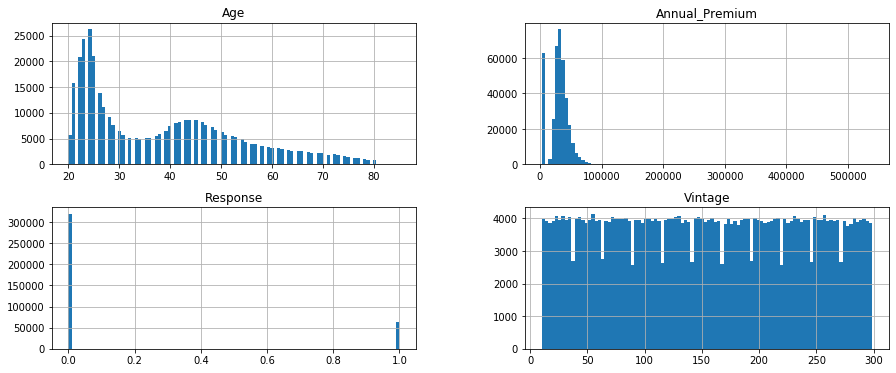

In [70]:
df.iloc[:,1:].hist(bins=100, figsize=[15,6]);

**- Response is higly imbalanced**

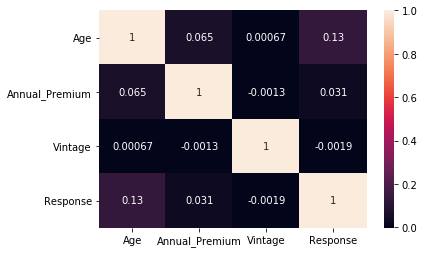

In [76]:
sns.heatmap(df.iloc[:,1:].corr(), annot= True); # Correlation matrix

In [71]:
df.iloc[:,1:].describe()

,Age,Annual_Premium,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000
mean,38.545691,30711.271362,154.189429,0.163811
std,15.226897,17061.595532,83.735107,0.370104
min,20.000000,2630.000000,10.000000,0.000000
25%,25.000000,24546.000000,81.000000,0.000000
50%,36.000000,31692.000000,154.000000,0.000000
75%,49.000000,39447.750000,227.000000,0.000000
max,85.000000,540165.000000,299.000000,1.000000


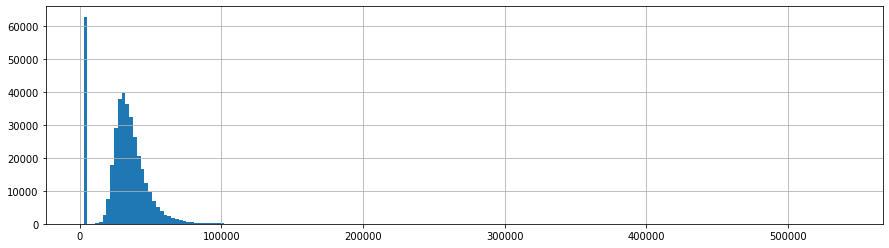

In [74]:
# Checking annual premium again
df.Annual_Premium.hist(bins = 200, figsize=[15,4]);

**- Annual Premium is highly right skewed as values are ranging from min= 2630.0 to max = 540165.0, so I will apply log transformation.**

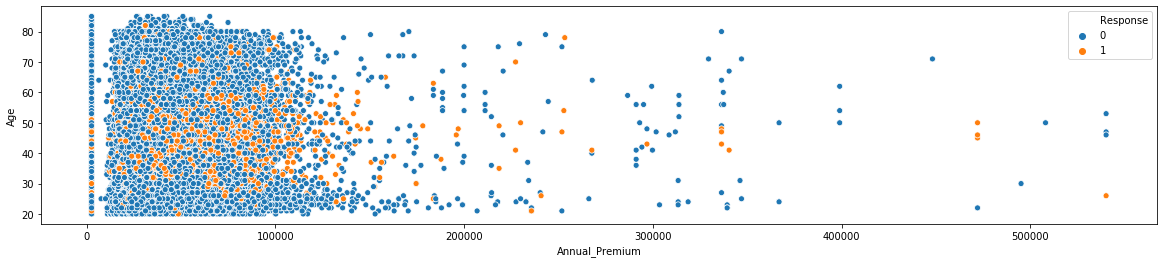

In [81]:
plt.figure(figsize=(20,4))
sns.scatterplot(x = df.Annual_Premium, y= df.Age, hue = df.Response );

**- All age groups are equally targeted for insurance but number decreases as the premium amount of insurance goes up.**

**- Most number of people who take insurance are from age group 30-50 yrs and taking upto the amount of 125000.**

## Feature engineering

In [14]:
train = df.copy()

#### - Dropping "id", "Driving license", "Region Code" and "Policy Sales channel" columns

In [15]:
def del_col(data):
    data.drop(["id", "Driving_License", "Region_Code", "Policy_Sales_Channel"], inplace = True, axis = 1)
    
del_col(train)

#### - Gender, Previously_Insured, Vehicle Age and Vehicle_Damage 

In [16]:
train.columns

Index(['Gender', 'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Vintage', 'Response'],
      dtype='object')

In [17]:
train.head(2)

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,22,1,< 1 Year,No,2630.0,16,0
1,Male,42,0,1-2 Year,Yes,43327.0,135,0


In [18]:
# One Hot Encoding the columns and removing the old ones
gender = pd.get_dummies(train.Gender, prefix = "Gender", drop_first=True)
vehicle_Age = pd.get_dummies(train.Vehicle_Age, prefix = "Vehicle_Age", drop_first=True)
vehicle_Damage = pd.get_dummies(train.Vehicle_Damage, prefix = "Vehicle_Damage", drop_first=True)
prev_Insured = pd.get_dummies(train.Previously_Insured, prefix = "Previously_Insured", drop_first=True)
train = pd.concat([train, gender, vehicle_Age, vehicle_Damage, prev_Insured], axis =1)
train.drop(["Gender", "Vehicle_Age", "Vehicle_Damage", "Previously_Insured"], inplace= True, axis = 1)

In [19]:
train.head(2)

,Age,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Previously_Insured_1
0,22,2630.0,16,0,1,1,0,0,1
1,42,43327.0,135,0,1,0,0,1,0


#### - Annual Premium
- Data is right skewed so will apply log transformation

In [20]:
train.Annual_Premium = np.log(train.Annual_Premium)

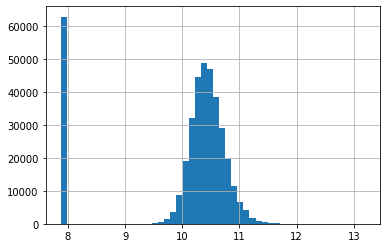

In [21]:
train.Annual_Premium.hist(bins =50);

In [22]:
train.Annual_Premium.describe()

count    382154.000000
mean         10.028103
std           0.992243
min           7.874739
25%          10.108304
50%          10.363820
75%          10.582732
max          13.199630
Name: Annual_Premium, dtype: float64

In [23]:
# Dividing into features and target
y = train["Response"]
X = train.drop("Response" , axis = 1)

**- Normalizing the feature variables using MinMax scaler**

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [25]:
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.head(2)

,Age,Annual_Premium,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Previously_Insured_1
0,0.030769,0.000000,0.020761,1.0,1.0,0.0,0.0,1.0
1,0.338462,0.526169,0.432526,1.0,0.0,0.0,1.0,0.0


In [26]:
X_norm.describe()

,Age,Annual_Premium,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Previously_Insured_1
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,0.285318,0.404396,0.498925,0.538011,0.435304,0.040887,0.480573,0.489182
std,0.234260,0.186340,0.289741,0.498554,0.495797,0.198028,0.499623,0.499884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.419457,0.245675,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.246154,0.467443,0.498270,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.446154,0.508554,0.750865,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
train.Response.value_counts()

0    319553
1     62601
Name: Response, dtype: int64

### Splitting into Train and Validation set

In [30]:
from sklearn.model_selection import train_test_split 

In [33]:
#split data into test and training sets for original data X_norm , y
X_train, X_valid, y_train, y_valid = train_test_split( X_norm , y, test_size=0.3, random_state=250, stratify = y)

# count of 0 and 1 in original data
print('Labels counts in y:', np.bincount(y)/len(y))
print('Labels counts in y_train:', np.bincount(y_train)/len(y_train))
print('Labels counts in y_test:', np.bincount(y_valid)/len(y_valid))

Labels counts in y: [0.83618908 0.16381092]
Labels counts in y_train: [0.83618746 0.16381254]
Labels counts in y_test: [0.83619284 0.16380716]


# Sampling

- As the response is highly imbalanced, so I will resample the data before training the model.

### 1. Oversampling

In [35]:
from sklearn.utils import resample

# concatenate our training data back together
comb = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_insured = comb[comb.Response==0]
insured = comb[comb.Response==1]

# upsample minority
insured_upsampled = resample(insured,
                          replace=True, # sample with replacement
                          n_samples=len(not_insured), # match number in majority class
                          random_state=250) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_insured, insured_upsampled])

# check new class counts
upsampled.Response.value_counts()

1    223686
0    223686
Name: Response, dtype: int64

In [39]:
upsampled_Y = upsampled["Response"]
upsampled_X = upsampled.drop("Response", axis= 1)

### 2. Undersampling

In [38]:
# downsample majority
notInsured_downsampled = resample(not_insured,
                          replace= False, # sample without replacement
                          n_samples=len(insured), # match number in majority class
                          random_state=250) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([insured, notInsured_downsampled])

# check new class counts
downsampled.Response.value_counts()

1    43821
0    43821
Name: Response, dtype: int64

In [40]:
downsampled_Y = downsampled["Response"]
downsampled_X = downsampled.drop("Response" , axis=1)

# Modelling and Prediction and Evaluation

**- Recall will be focus metric here because I want to correctly and accurately identify those people who will actually take the insurance. I want to increase predicted true values (True positive) maximum when compared to actual true values (True positive+ False negative).**

**- I want to reduce false negatives in order to avoid losing potential customers**

In [86]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score
from sklearn.metrics import plot_confusion_matrix

In [89]:
# MODEL DEFINION FUNCTION

def run_model(X_train, y_train, X_valid , y_valid, algo):
    model = algo.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid, y_pred))
    plot_confusion_matrix(model, X_valid, y_valid, normalize='true', cmap='YlGn')  
    plt.show();
    print(f'Recall = {recall_score(y_valid, y_pred)}')

### 1 . Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     95867
           1       0.50      0.10      0.17     18780

    accuracy                           0.84    114647
   macro avg       0.67      0.54      0.54    114647
weighted avg       0.79      0.84      0.79    114647



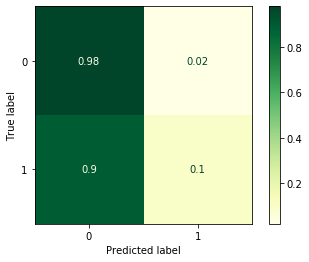

Recall = 0.10181043663471778


In [90]:
# Logistic Regression with original data
run_model(X_train, y_train, X_valid, y_valid, LR())

**- Recall is very bad =0.10 with original data**

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     95867
           1       0.35      0.97      0.52     18780

    accuracy                           0.70    114647
   macro avg       0.67      0.81      0.65    114647
weighted avg       0.89      0.70      0.74    114647



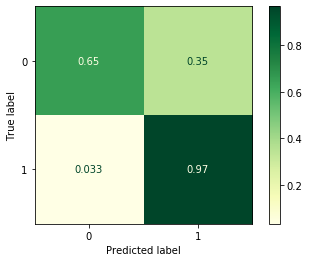

Recall = 0.9669329073482428


In [91]:
# Logistic Regression with oversampled data
run_model(upsampled_X, upsampled_Y, X_valid, y_valid, LR())

**- Recall has greatly increased with oversampling = 0.97 when compared with original data**

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     95867
           1       0.35      0.96      0.52     18780

    accuracy                           0.70    114647
   macro avg       0.67      0.81      0.65    114647
weighted avg       0.88      0.70      0.74    114647



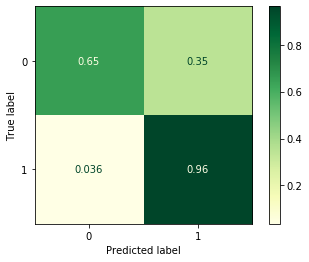

Recall = 0.9635782747603834


In [92]:
# Logistic Regression with undersampled data
run_model(downsampled_X, downsampled_Y, X_valid, y_valid, LR())

**- Recall has also greatly increased with undersampling = 0.96 when compared with original data**

### - 2. KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     95867
           1       0.40      0.75      0.52     18780

    accuracy                           0.77    114647
   macro avg       0.67      0.76      0.69    114647
weighted avg       0.85      0.77      0.80    114647



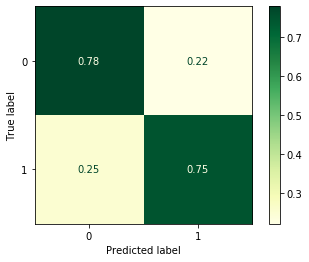

Recall = 0.7479233226837061


In [93]:
# KNeighborsClassifier with oversampled data
run_model(upsampled_X, upsampled_Y, X_valid, y_valid, KNC())

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     95867
           1       0.40      0.87      0.55     18780

    accuracy                           0.76    114647
   macro avg       0.68      0.81      0.69    114647
weighted avg       0.87      0.76      0.79    114647



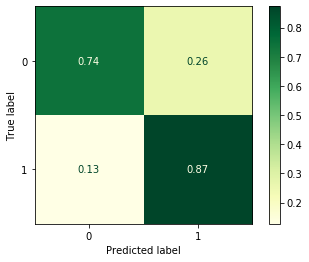

Recall = 0.8726304579339723


In [94]:
# KNeighborsClassifier with undersampled data
run_model(downsampled_X, downsampled_Y, X_valid, y_valid, KNC())

**- KNN classifier performs worse than Logistic Regression. KNN has given better results for undersampled data**

### - 3. Gaussian Naive Bayes Classifier

              precision    recall  f1-score   support

           0       1.00      0.65      0.78     95867
           1       0.35      0.99      0.52     18780

    accuracy                           0.70    114647
   macro avg       0.67      0.82      0.65    114647
weighted avg       0.89      0.70      0.74    114647



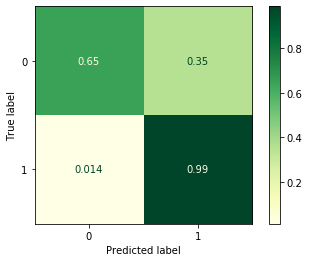

Recall = 0.986261980830671


In [95]:
# Gaussian Naive Bayes Classifier with oversampled data
run_model(upsampled_X, upsampled_Y, X_valid, y_valid, GNB())

              precision    recall  f1-score   support

           0       1.00      0.65      0.78     95867
           1       0.35      0.99      0.52     18780

    accuracy                           0.70    114647
   macro avg       0.67      0.82      0.65    114647
weighted avg       0.89      0.70      0.74    114647



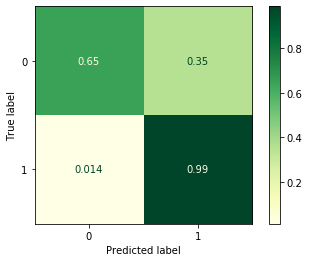

Recall = 0.986261980830671


In [96]:
# Gaussian Naive Bayes with undersampled data
run_model(downsampled_X, downsampled_Y, X_valid, y_valid, GNB())

**- Recall score by Gaussian Naivye Bayes for both undersampled and oversampled data outperforms both LR and KNN models**

### 4 . Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     95867
           1       0.41      0.41      0.41     18780

    accuracy                           0.81    114647
   macro avg       0.65      0.65      0.65    114647
weighted avg       0.81      0.81      0.81    114647



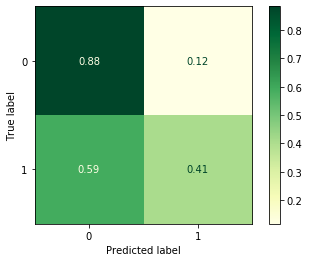

Recall = 0.40846645367412143


In [97]:
#  Decision Tree Classifier with oversampled data
run_model(upsampled_X, upsampled_Y, X_valid, y_valid, DTC())

              precision    recall  f1-score   support

           0       0.94      0.76      0.84     95867
           1       0.38      0.74      0.50     18780

    accuracy                           0.76    114647
   macro avg       0.66      0.75      0.67    114647
weighted avg       0.85      0.76      0.78    114647



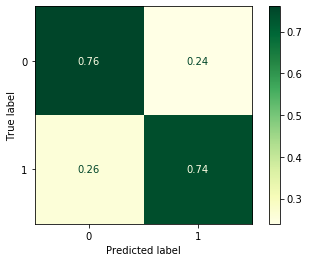

Recall = 0.7413738019169329


In [98]:
# Decision Tree Classifier with undersampled data
run_model(downsampled_X, downsampled_Y, X_valid, y_valid, DTC())

**- Decision tree Classifier has performed worse than LR, KNN and GNB. In DTC, undersampling has produced better results**

### 5. Random Forest Classifier

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     95867
           1       0.45      0.37      0.40     18780

    accuracy                           0.82    114647
   macro avg       0.67      0.64      0.65    114647
weighted avg       0.81      0.82      0.82    114647



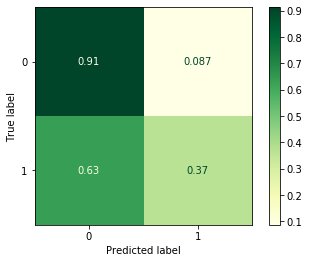

Recall = 0.36501597444089456


In [107]:
# Random Forest Classifier with original data
run_model(X_train, y_train, X_valid, y_valid, RFC())

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     95867
           1       0.44      0.52      0.47     18780

    accuracy                           0.81    114647
   macro avg       0.67      0.69      0.68    114647
weighted avg       0.83      0.81      0.82    114647



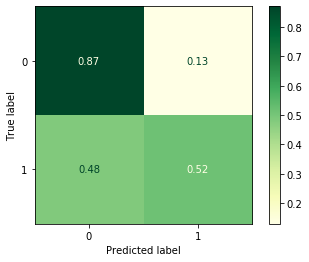

Recall = 0.5169861554845581


In [101]:
#  Random Forest Classifier with oversampled data
run_model(upsampled_X, upsampled_Y, X_valid, y_valid, RFC())

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     95867
           1       0.40      0.87      0.55     18780

    accuracy                           0.77    114647
   macro avg       0.68      0.81      0.70    114647
weighted avg       0.87      0.77      0.80    114647



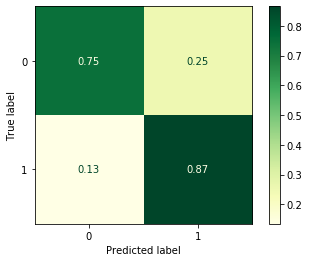

Recall = 0.8658679446219383


In [100]:
# Random Forest Classifier with undersampled data
run_model(downsampled_X, downsampled_Y, X_valid, y_valid, RFC())

**- We see than Random Forest with undersampled data gives higher recall but it's performance is comparatively worse than other models.**